In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *


data = pd.read_csv('archive/churn-bigml-80.csv')
data_test = pd.read_csv('archive/churn-bigml-20.csv')
print('Train Data Shape =',data.shape)
print('Columns =',data.columns)

data.describe()

Train Data Shape = (2666, 20)
Columns = Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [75]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
from sklearn.preprocessing import LabelEncoder

data['Churn']=LabelEncoder().fit_transform(data['Churn'])
corr = data.corr()
corr['Churn'].sort_values()

Number vmail messages    -0.086474
Total intl calls         -0.069882
Total eve calls          -0.001539
Area code                 0.001019
Total night calls         0.012262
Account length            0.017728
Total day calls           0.018290
Total night charge        0.033635
Total night minutes       0.033639
Total eve charge          0.072893
Total eve minutes         0.072906
Total intl minutes        0.086204
Total intl charge         0.086216
Total day minutes         0.195688
Total day charge          0.195689
Customer service calls    0.202590
Churn                     1.000000
Name: Churn, dtype: float64

In [4]:
'''
from sklearn.utils import resample
df_majority = data[data.Churn==0]
df_minority = data[data.Churn==1]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=338,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
data = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data.Churn.value_counts()
'''

'\nfrom sklearn.utils import resample\ndf_majority = data[data.Churn==0]\ndf_minority = data[data.Churn==1]\n \ndf_majority_downsampled = resample(df_majority, \n                                 replace=False,    # sample without replacement\n                                 n_samples=338,     # to match minority class\n                                 random_state=123) # reproducible results\n \n# Combine minority class with downsampled majority class\ndata = pd.concat([df_majority_downsampled, df_minority])\n \n# Display new class counts\ndata.Churn.value_counts()\n'

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


features = ['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

y=data['Churn']
X=data[features]

y_test=data_test['Churn']
X_test=data_test[features]

s = (X.dtypes == 'object')
object_cols = list(s[s].index)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X = pd.concat([num_X, OH_cols], axis=1)
X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

X.columns=X.columns.astype(str)
X_test.columns=X.columns.astype(str)


print('input size = ',X.shape)


input size =  (2666, 71)


In [113]:
from sklearn.model_selection import learning_curve
def plot_grid_search(cv_results, name_param):    
    params=[d[name_param] for d in cv_results['params']]
    scores=cv_results['mean_test_score']
    fig = plt.figure()
    plt.plot(params,scores)
    fig.suptitle('Grid Search Scores', fontsize=20)
    plt.xlabel(name_param)
    plt.ylabel('CV Average Score')
    plt.grid('on')
def plot_learning_curve(estimator, X, y,train_sizes=np.linspace(0.01, 1.0, 10)):
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=5,n_jobs=-1,train_sizes=train_sizes,scoring = make_scorer(accuracy_score),return_times=True)
        fit_times_means = np.mean(fit_times, axis =1)
        print('Fitting time (seconds) =' , fit_times_means[-1])
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        fig = plt.figure()
        plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
        fig.suptitle('Learning curves', fontsize=20)
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend(loc="best")
        plt.grid('on')
    

Cross validation Accuracy: 0.908
Testing data Accuracy: 0.918
Fitting time (seconds) = 0.04070754051208496


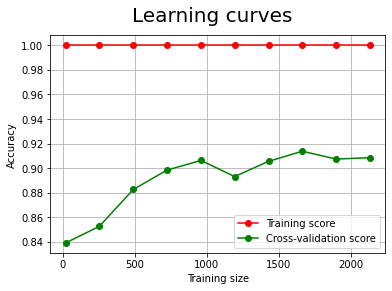

In [114]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer ,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std



DT = DecisionTreeClassifier(random_state=7)



n_scores = cross_val_score(DT, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

DT.fit(X,y)

pred_y=DT.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(DT, X, y)


#model1.fit(X,y)
#preds_val1=model1.predict(X_test)
#print('MSE model1 = ',accuracy_score(y_test, preds_val1))

In [26]:
'''
from sklearn.model_selection import GridSearchCV , ParameterGrid
ccp_alphas = model1.cost_complexity_pruning_path(X, y)["ccp_alphas"]
max_depth_grid_search = GridSearchCV(estimator = model1,
                                    scoring = make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"max_depth":[[k] for k in range(30)],"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
                                    n_jobs = -1)

max_depth_grid_search.fit(X, y)

model1_prunned=max_depth_grid_search.best_estimator_
print(max_depth_grid_search.best_params_)
n_scores = cross_val_score(model1_prunned, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


#plot_grid_search(max_depth_grid_search.cv_results_,'max_depth')
'''

'\nfrom sklearn.model_selection import GridSearchCV , ParameterGrid\nccp_alphas = model1.cost_complexity_pruning_path(X, y)["ccp_alphas"]\nmax_depth_grid_search = GridSearchCV(estimator = model1,\n                                    scoring = make_scorer(accuracy_score),\n                                    param_grid=ParameterGrid({"max_depth":[[k] for k in range(30)],"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),\n                                    n_jobs = -1)\n\nmax_depth_grid_search.fit(X, y)\n\nmodel1_prunned=max_depth_grid_search.best_estimator_\nprint(max_depth_grid_search.best_params_)\nn_scores = cross_val_score(model1_prunned, X, y, scoring=\'accuracy\', cv=5, n_jobs=-1)\n# report performance\nprint(\'Accuracy: %.3f (%.3f)\' % (mean(n_scores), std(n_scores)))\n\n\n#plot_grid_search(max_depth_grid_search.cv_results_,\'max_depth\')\n'

In [115]:

from sklearn.model_selection import GridSearchCV , ParameterGrid
ccp_alphas = DT.cost_complexity_pruning_path(X, y)["ccp_alphas"]
ccp_alpha_grid_search = GridSearchCV(estimator = DT,
                                    scoring = make_scorer(accuracy_score),
                                    param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
                                    cv=5,
                                    n_jobs = -1)

ccp_alpha_grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f788ea95130>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'ccp_alpha': 0.0008563107190753838}
Cross validation Accuracy: 0.933
Testing data Accuracy: 0.952
Fitting time (seconds) = 0.04266057014465332


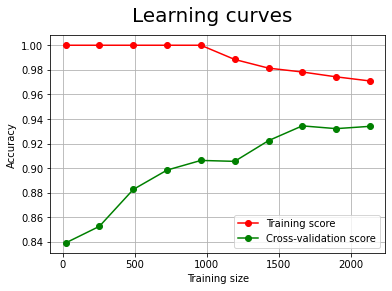

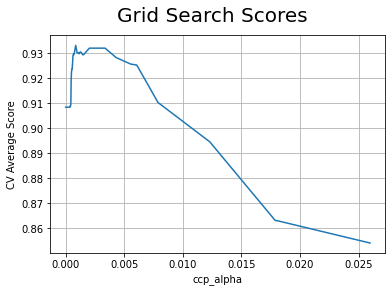

In [117]:
DT_prunned=ccp_alpha_grid_search.best_estimator_
print('Best parameter =',ccp_alpha_grid_search.best_params_)
n_scores = cross_val_score(DT_prunned, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# report performance
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

DT_prunned.fit(X,y)

pred_y=DT_prunned.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))


plot_learning_curve(DT_prunned, X, y)


plot_grid_search(ccp_alpha_grid_search.cv_results_,'ccp_alpha')

#model1_prunned.fit(X_train,y_train)
#preds_val1=model1_prunned.predict(X_test)
#print('MSE model1 = ',accuracy_score(y_test, preds_val1))

2022-02-14 05:48:20.570839: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 05:48:20.570839: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 05:48:20.570996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-14 05:48:20.570999: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-

2022-02-14 05:48:26.103271: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 05:48:26.103647: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-14 05:48:26.104173: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification

2022-02-14 05:48:26.801561: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 05:48:26.802106: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
2022-02-14 05:48:26.896838: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 05:48:26.897587: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if i

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

Fitting time (seconds) = 3.844835138320923
Cross validation Accuracy: 0.880


/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Testing data Accuracy: 0.876


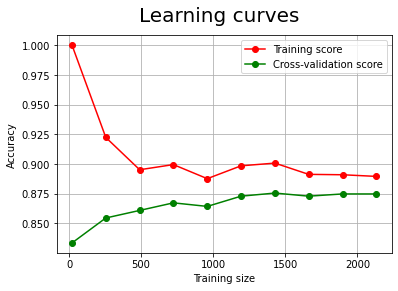

In [169]:
import tensorflow as tf
from keras import models
from keras import layers

from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

input_shape = [X.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))
    
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=1000, 
                                 verbose=0)

n_scores = cross_val_score(Neural_net, X, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X, y)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

Neural_net.fit(X,y)

pred_y=Neural_net.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

Cross validation Accuracy: 0.926
Testing data Accuracy: 0.933
Fitting time (seconds) = 2.846229076385498


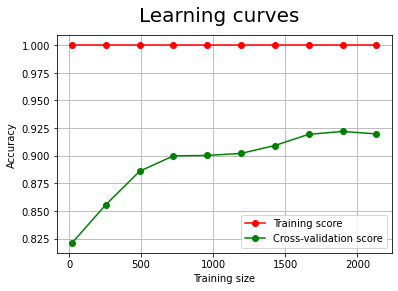

In [168]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(base_estimator=DT_prunned,learning_rate=1,random_state=7)
# evaluate the model
n_scores = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

ada_boost.fit(X,y)

pred_y=ada_boost.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(ada_boost, X, y)

In [166]:

lr_grid_search = GridSearchCV(estimator = ada_boost,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"learning_rate":[[10**-k] for k in range(0,10)]}),
                             cv=5,
                    n_jobs=-1)     

lr_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0008563107190753838,
                                                                                random_state=7),
                                          learning_rate=1),
             n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f786049a1c0>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'learning_rate': 0.0001}
Cross validation Accuracy: 0.937
Testing data Accuracy: 0.949
Fitting time (seconds) = 2.161827278137207


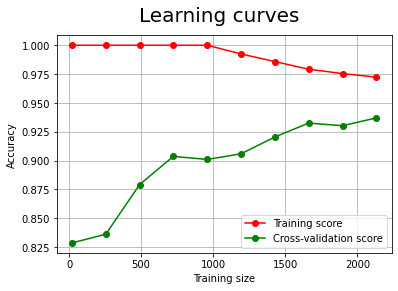

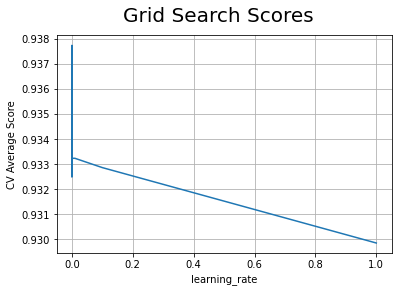

In [167]:
ada_optimal=lr_grid_search.best_estimator_
print('Best parameter =',lr_grid_search.best_params_)
n_scores = cross_val_score(ada_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

ada_optimal.fit(X,y)

pred_y=ada_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(ada_optimal, X, y)


plot_grid_search(lr_grid_search.cv_results_,'learning_rate')

Cross validation Accuracy: 0.854
Testing data Accuracy: 0.858
Fitting time (seconds) = 0.15457987785339355


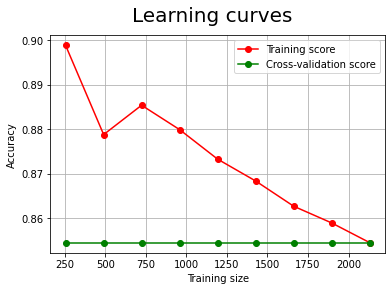

In [132]:
from sklearn import svm
svm1 = svm.SVC() 

n_scores = cross_val_score(svm1, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm1.fit(X,y)

pred_y=svm1.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(svm1, X, y)

Cross validation Accuracy: 0.854
Testing data Accuracy: 0.858
Fitting time (seconds) = 0.17599639892578126


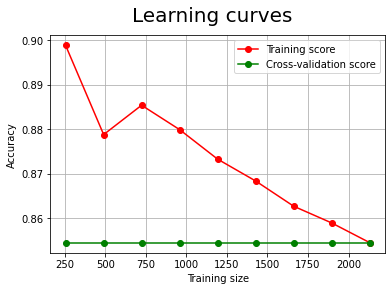

In [133]:
svm2 = svm.SVC(kernel='poly') 

n_scores = cross_val_score(svm2, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm2.fit(X,y)

pred_y=svm2.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(svm2, X, y)

In [134]:

degree_grid_search = GridSearchCV(estimator = svm2,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"degree":[[k] for k in range(1,25)]}),
                             cv=5,
                    n_jobs=-1)     

degree_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f788e3c3430>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'degree': 18}
Cross validation Accuracy: 0.892
Testing data Accuracy: 0.901
Fitting time (seconds) = 0.4561335563659668


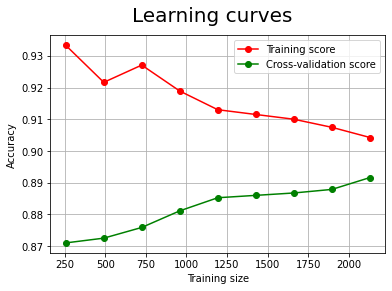

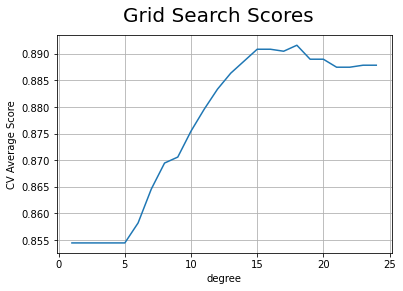

In [135]:
svm2_optimal=degree_grid_search.best_estimator_
print('Best parameter =',degree_grid_search.best_params_)
n_scores = cross_val_score(svm2_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)

print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

svm2_optimal.fit(X,y)

pred_y=svm2_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))

plot_learning_curve(svm2_optimal, X, y)


plot_grid_search(degree_grid_search.cv_results_,'degree')

Cross validation Accuracy: 0.854
Testing data Accuracy: 0.865
Fitting time (seconds) = 0.0051883220672607425


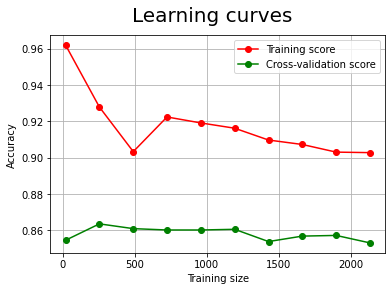

In [124]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

knn.fit(X,y)

pred_y=knn.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(knn, X, y)

In [125]:

k_grid_search = GridSearchCV(estimator = knn,
                    scoring = make_scorer(accuracy_score),
                    param_grid=ParameterGrid({"n_neighbors":[[k] for k in range(1,31)]}),
                             cv=5,
                    n_jobs=-1)        

k_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f790df8e490>,
             scoring=make_scorer(accuracy_score))

Best parameter = {'n_neighbors': 8}
Cross validation Accuracy: 0.873
Testing data Accuracy: 0.886
Fitting time (seconds) = 0.005136013031005859


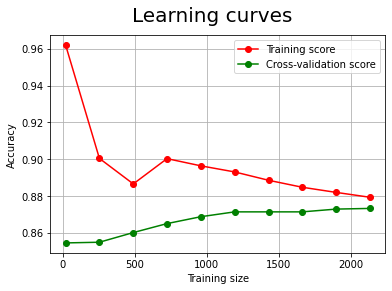

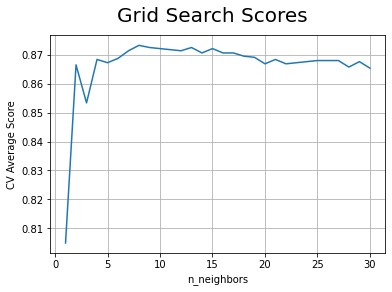

In [127]:
print('Best parameter =',k_grid_search.best_params_)

knn_optimal = k_grid_search.best_estimator_

n_scores = cross_val_score(knn_optimal, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print('Cross validation Accuracy: %.3f' % (mean(n_scores)))

knn_optimal.fit(X,y)

pred_y=knn_optimal.predict(X_test)
print('Testing data Accuracy: %.3f' % accuracy_score(y_test, pred_y))
plot_learning_curve(knn_optimal, X, y)

plot_grid_search(k_grid_search.cv_results_,'n_neighbors')



#model2_optimal.fit(X_train,y_train)
#preds_val2=model2_optimal.predict(X_test)
#print('MSE model2 = ',accuracy_score(y_test, preds_val2))
